In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [2]:
data = pd.read_csv("powerconsumption.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])

df = data[['Datetime', 'PowerConsumption_Zone1']].copy()

df = df.set_index('Datetime')
df = df.resample('h').mean()

df = df.rename(columns={"PowerConsumption_Zone1": "count"})
df = df.reset_index()

df = df.rename(columns={"Datetime": "ds"})
df = df.rename(columns={"count": "y"})
df['unique_id'] = 1.0

In [3]:
df

,ds,y,unique_id
0,2017-01-01 00:00:00,29197.974683,1.0
1,2017-01-01 01:00:00,24657.215190,1.0
2,2017-01-01 02:00:00,22083.037973,1.0
3,2017-01-01 03:00:00,20811.139240,1.0
4,2017-01-01 04:00:00,20475.949367,1.0
...,...,...,...
8731,2017-12-30 19:00:00,37513.814957,1.0
8732,2017-12-30 20:00:00,37008.871988,1.0
8733,2017-12-30 21:00:00,35358.174905,1.0
8734,2017-12-30 22:00:00,33993.409380,1.0


In [5]:
from pmdarima.model_selection import train_test_split

day_length = 24

#day_num = 60
day_num = 120
test_days = 7
train_days = day_num - test_days

X = df[:day_length * day_num]

X_train, X_test = train_test_split(
    X,
    train_size=train_days * day_length
)

In [61]:
from neuralforecast import NeuralForecast
from neuralforecast.models import GRU, NHITS, TiDE, TFT, Informer, BiTCN, NBEATS

horizon = 24

models = [
                  GRU(
            h=horizon,
            input_size=2 * horizon,
            scaler_type='standard',
            encoder_hidden_size=64,
            decoder_hidden_size=64,
            max_steps=500),
                  NBEATS(
            h=horizon, 
            input_size=2 * horizon,
            max_steps=500),
                  NHITS(
            h=horizon,
            input_size=2 * horizon,
            max_steps=500),
                  TiDE(
            h=horizon,
            input_size=2 * horizon,
            max_steps=500),
                  Informer(
            h=horizon,
            input_size=2 * horizon,
            max_steps=50,
            hidden_size = 256,
            conv_hidden_size = 32,
            scaler_type='robust'),
                  BiTCN(
            h=horizon,
            input_size=2 * horizon,
            max_steps=500,
            scaler_type='standard'),
                  TFT(
            h=horizon,
            input_size=2 * horizon,
            max_steps=50)
          ]
nf = NeuralForecast(models=models, freq='ME')
nf.fit(df=X_train)
yy_hat_dict = nf.predict()

Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | GRU           | 37.8 K | train
4 | mlp_decoder  | MLP           | 4.2 K  | train
-------------------------------------------------------
42.0 K    Trainable params
0         Non-trainable params
42.0 K    Total params
0.168     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
3.5 K     Non-trainable params
2.5 M     Total params
10.120    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.040    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type          | Params | Mode 
-----------------------------------------------------------
0 | loss             | MAE           | 0      | train
1 | padder_train     | ConstantPad1d | 0      | train
2 | scaler           | TemporalNorm  | 0      | train
3 | dense_encoder    | Sequential    | 313 K  | train
4 | dense_decoder    | Sequential    | 1.1 M  | train
5 | temporal_decoder | MLPResidual   | 4.4 K  | train
6 | global_skip      | Linear        | 1.2 K  | train
-----------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.486     Total estimated model params size (MB)
24        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralforecast/common/_base_model.py:537: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | enc_embedding | DataEmbedding | 768    | train
4 | dec_embedding | DataEmbedding | 768    | train
5 | encoder       | TransEncoder  | 759 K  | train
6 | decoder       | TransDecoder  | 545 K  | train
--------------------------------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.22

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | lin_hist      | Linear        | 32     | train
4 | drop_hist     | Dropout       | 0      | train
5 | net_bwd       | Sequential    | 6.4 K  | train
6 | drop_temporal | Dropout       | 0      | train
7 | temporal_lin1 | Linear        | 784    | train
8 | temporal_lin2 | Linear        | 408    | train
9 | output_lin    | Linear        | 17     | train
--------------------------------------------------------
7.7 K     Trainable params
0         Non-trainable params
7.7 K     Total params
0.031     Total estimated model params size (MB)
34        Modules in train mode
0   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | MAE                      | 0      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 512    | train
4 | temporal_encoder        | TemporalCovariateEncoder | 613 K  | train
5 | temporal_fusion_decoder | TemporalFusionDecoder    | 256 K  | train
6 | output_adapter          | Linear                   | 129    | train
-----------------------------------------------------------------------------
870 K     Trainable params
0         Non-trainable params
870 K     Total params
3.481     Total estimated m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [7]:
yy_hat_dict = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [62]:
yy_hat_dict

,unique_id,ds,GRU,NBEATS,NHITS,TiDE,Informer,BiTCN,TFT
0,1.0,2017-04-30 23:00:00,27619.140625,26552.798828,26676.062500,27865.156250,25869.949219,27629.246094,27007.353516
1,1.0,2017-05-31 23:00:00,24362.449219,24155.341797,24037.763672,23926.396484,24651.494141,24586.396484,24575.158203
2,1.0,2017-06-30 23:00:00,22561.761719,22366.441406,22218.332031,21983.500000,22115.767578,23060.937500,22802.542969
3,1.0,2017-07-31 23:00:00,21812.837891,22132.464844,21948.980469,21959.070312,22902.796875,22740.632812,22140.843750
4,1.0,2017-08-31 23:00:00,22199.726562,22356.082031,22202.945312,22198.677734,20107.609375,22592.074219,22218.273438
5,1.0,2017-09-30 23:00:00,20311.812500,21312.109375,21871.851562,21745.664062,21927.769531,22144.617188,22704.181641
6,1.0,2017-10-31 23:00:00,19836.085938,20601.226562,21005.123047,20984.023438,22597.269531,21991.449219,23499.816406
7,1.0,2017-11-30 23:00:00,20352.945312,21999.732422,21680.435547,21634.533203,22546.171875,22734.871094,24600.830078
8,1.0,2017-12-31 23:00:00,22509.812500,24698.500000,24609.111328,25214.798828,20490.296875,24690.042969,25967.802734
9,1.0,2018-01-31 23:00:00,25640.330078,28240.398438,28428.367188,28142.080078,28198.699219,27441.812500,27549.640625


In [63]:
((X_test[:24])['y']).values

array([27295.41442333, 24612.787945  , 23649.687835  , 23711.68998833,
       24111.60387333, 21503.37997833, 23196.03875167, 25868.33154   ,
       26693.99354167, 28792.76641667, 31442.32508167, 35657.43810667,
       36051.151775  , 34824.54252   , 33956.51237833, 33257.95479167,
       32777.438105  , 33346.82454167, 35563.40150667, 43435.60818167,
       44193.06781333, 41840.086115  , 37229.19267833, 31598.36383167])

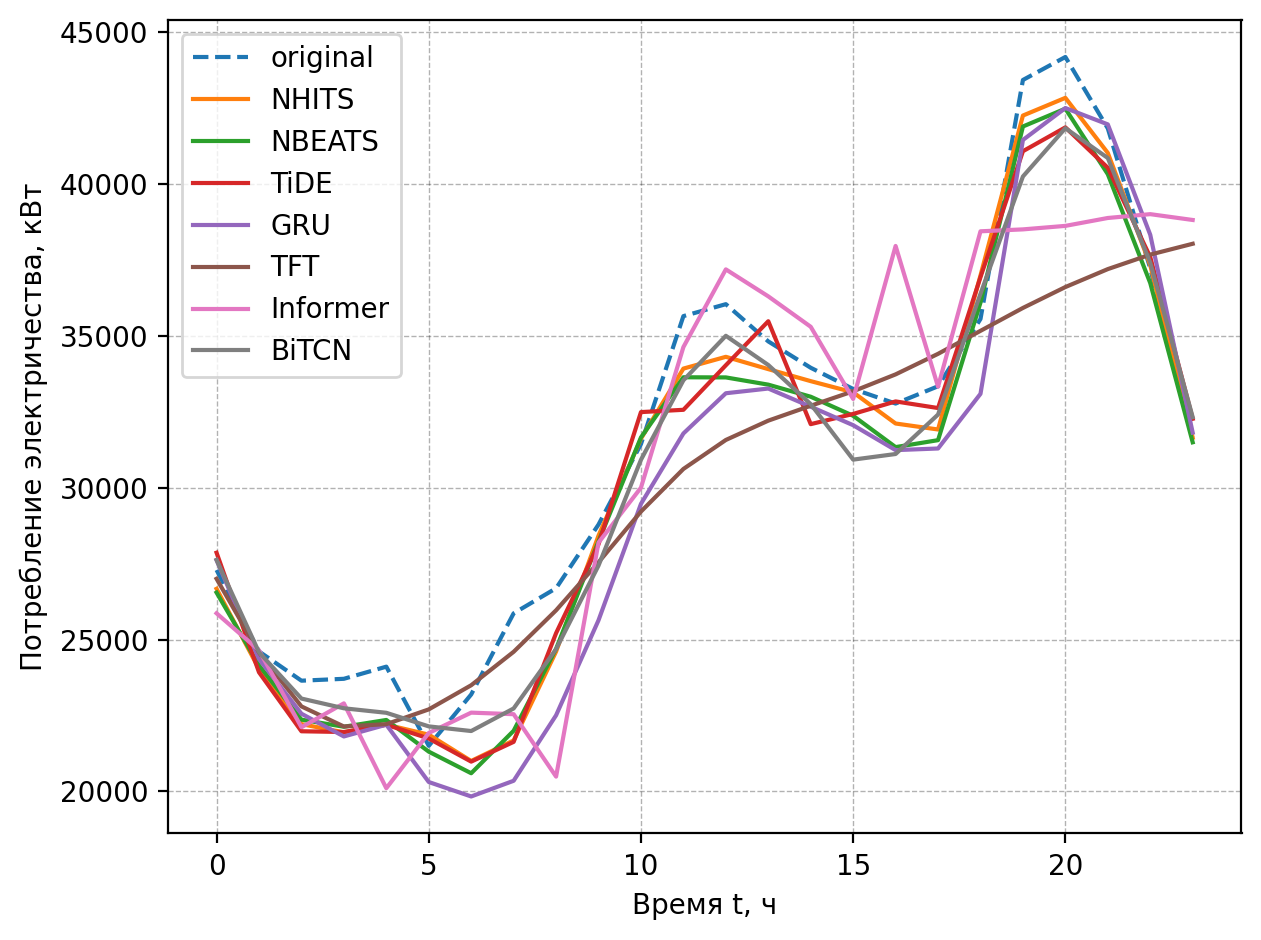

In [64]:
models_names = ['NHITS', 'NBEATS', 'TiDE', 'GRU', 'TFT', 'Informer', 'BiTCN']
models_familys = [ 'MLP', 'MLP', 'MLP', 'RNN', 'Transformer', 'Transformer', 'CNN']

y_test = (X_test[:24]['y']).values

plt.plot(y_test, label="original", ls='--')

for name in models_names:
    y_pred = (yy_hat_dict[name]).values
    plt.plot(y_pred, label=name)

plt.ylabel("Потребление электричества, кВт")
plt.xlabel("Время t, ч")
plt.grid(True, 'major', 'both', ls='--', lw=.5, c='k', alpha=.3)
plt.legend()

plt.tight_layout()
plt.savefig("compare.pdf")

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

def bench_model(y_test, y_pred, model_name, model_family):
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)
    
    new_row = pd.Series({'Model':model_name, 'Family': model_family, 'MAPE': mape, 'MAE': mae, "R^2" : R2, "EV" : exp_var})

    return new_row

In [66]:
model_rows = []

for (name, family) in zip(models_names, models_familys):
    y_pred = (yy_hat_dict[name]).values
    row = bench_model(y_test, y_pred, name, family)
    df_row = pd.DataFrame([row], columns=row.index)
    model_rows.append(df_row)


df = pd.DataFrame()

df = pd.concat(model_rows).reset_index(drop=True)
print(df)

      Model       Family      MAPE          MAE       R^2        EV
0     NHITS          MLP  0.039726  1149.940925  0.947890  0.970637
1    NBEATS          MLP  0.044487  1333.332768  0.938842  0.977712
2      TiDE          MLP  0.046935  1419.916550  0.929104  0.953239
3       GRU          RNN  0.065780  1951.594862  0.866726  0.945050
4       TFT  Transformer  0.065606  2253.439248  0.749051  0.795219
5  Informer  Transformer  0.073771  2344.104400  0.764465  0.771744
6     BiTCN          CNN  0.040790  1274.628955  0.943828  0.970266
